In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN  # Library untuk algoritma clustering
from sklearn.metrics import silhouette_score  # Library untuk evaluasi model clustering

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')

In [2]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(["Customer Key","Sl_No"], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

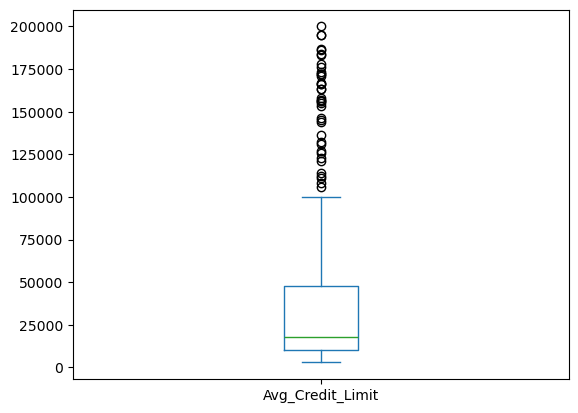

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

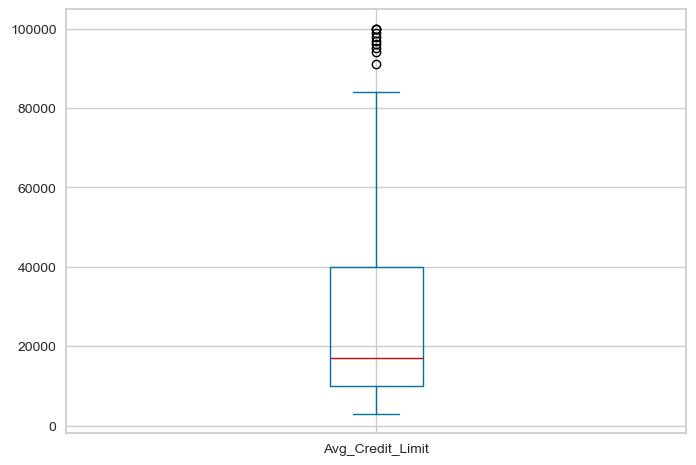

In [9]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):

    if not is_numeric_dtype(data_frame[kolom_outlier]):
        raise ValueError("Kolom harus bertipe numerik")

    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_bersih = data_frame[(data_frame[kolom_outlier] >= lower_bound) &
                            (data_frame[kolom_outlier] <= upper_bound)]

    return data_bersih

data_bersih = remove_outlier(df_credit, "Avg_Credit_Limit")

print("Jumlah data sebelum dibuang outlier:", df.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

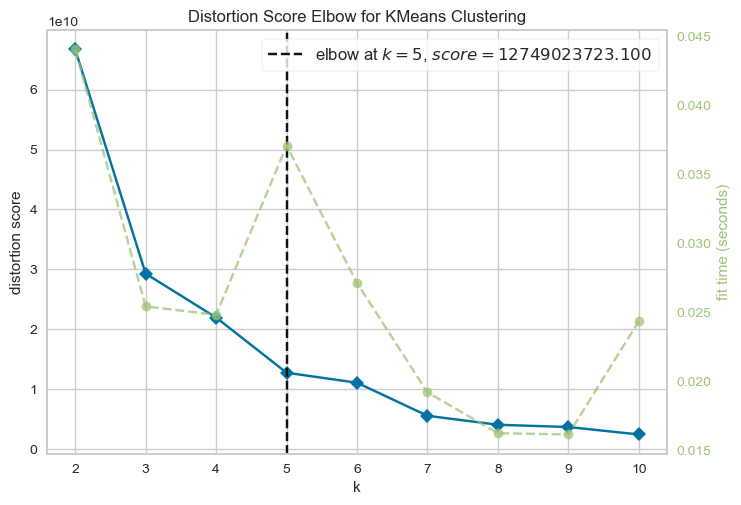

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)

visualizer = KElbowVisualizer(kmeans, k=(2,11))
visualizer.fit(data_bersih)
visualizer.show()

Silhouette Score K-Means for  2  clusters : 0.7254150167909509
Silhouette Score K-Means for  3  clusters : 0.7058100919802311
Silhouette Score K-Means for  4  clusters : 0.6772479571163517
Silhouette Score K-Means for  5  clusters : 0.594706521777336
Silhouette Score K-Means for  6  clusters : 0.6271336425919736
Silhouette Score K-Means for  7  clusters : 0.6193411786974923
Silhouette Score K-Means for  8  clusters : 0.605060126505977
Silhouette Score K-Means for  9  clusters : 0.5799642672740519
Silhouette Score K-Means for  10  clusters : 0.5975612973402464


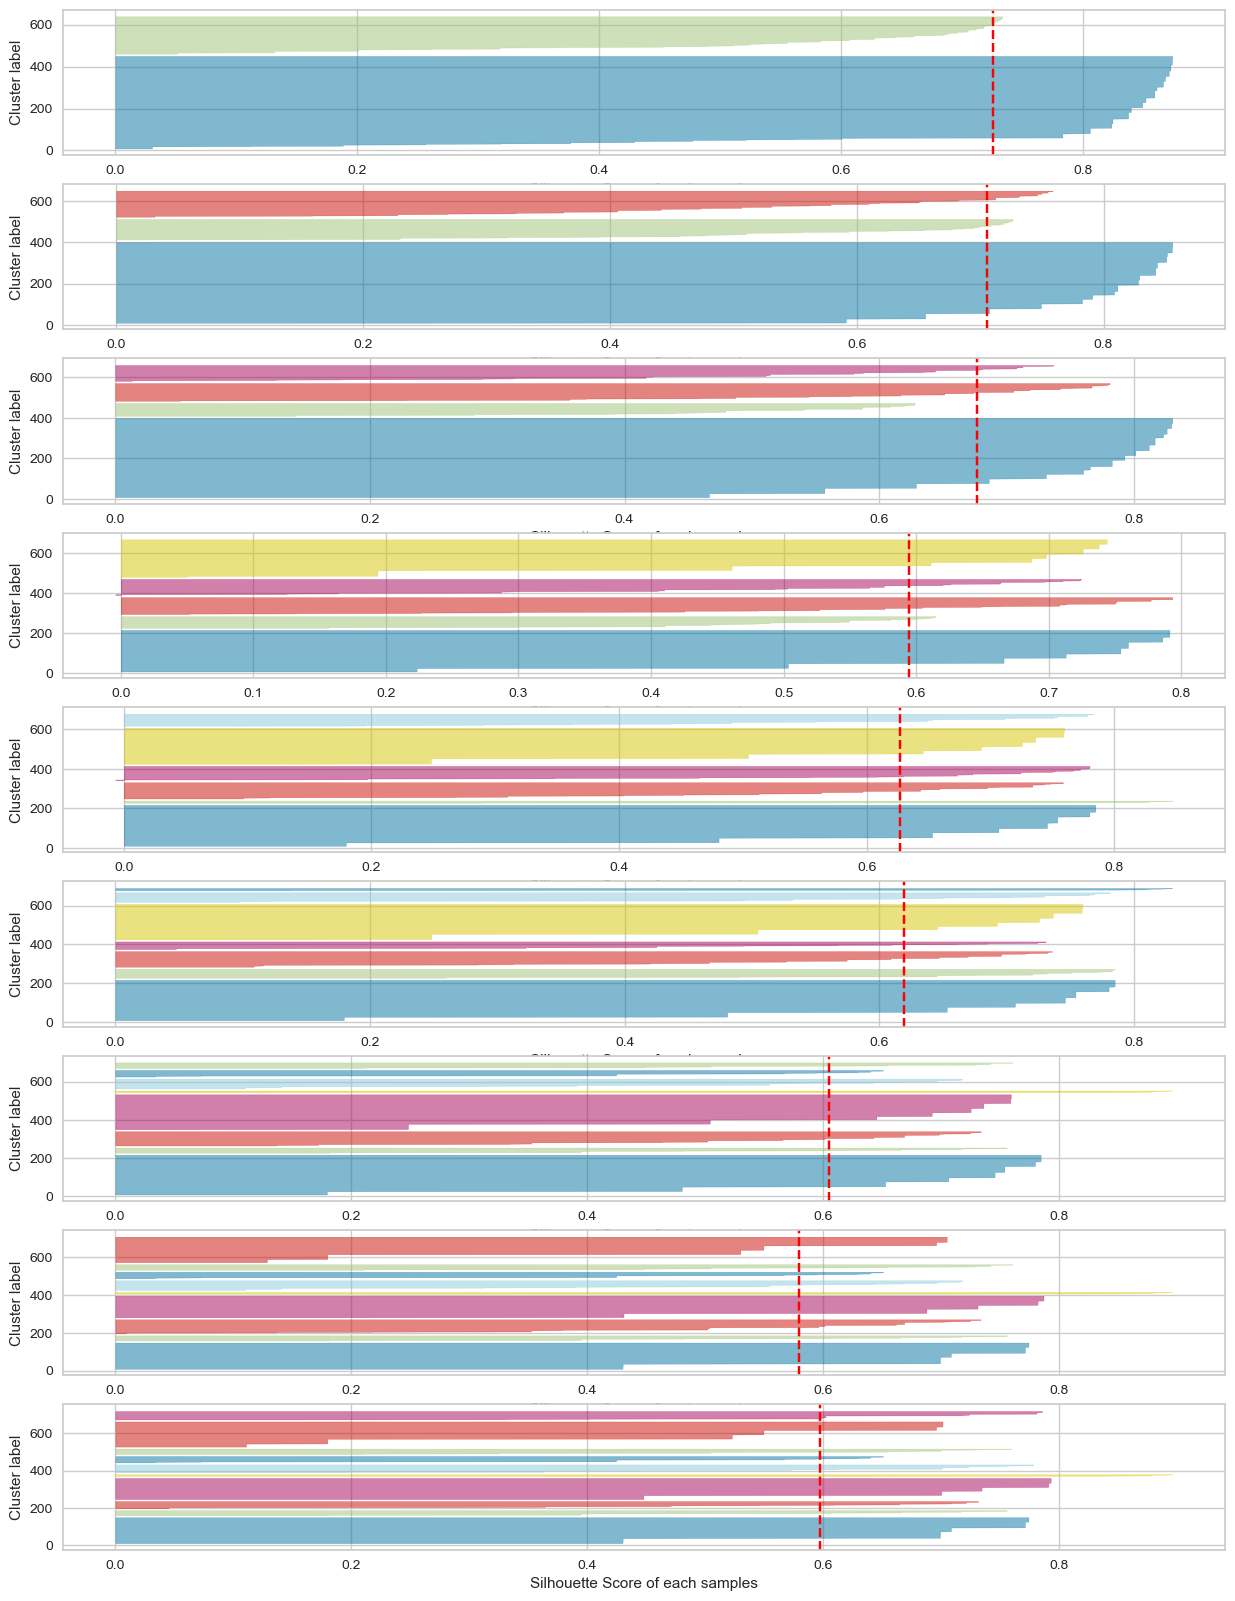

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=81)
    KM_clusters=kMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [12]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

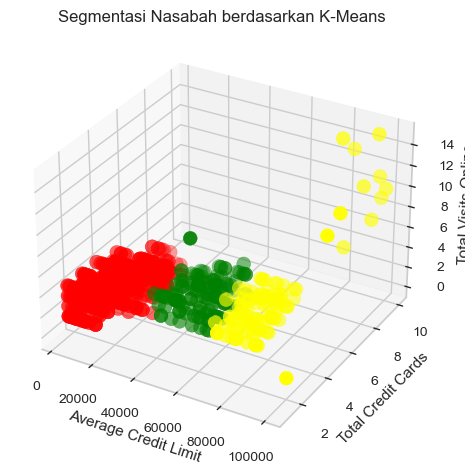

Silhouette Score K-Means: 0.706


In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=81)

K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score (data_bersih, K_clusters))

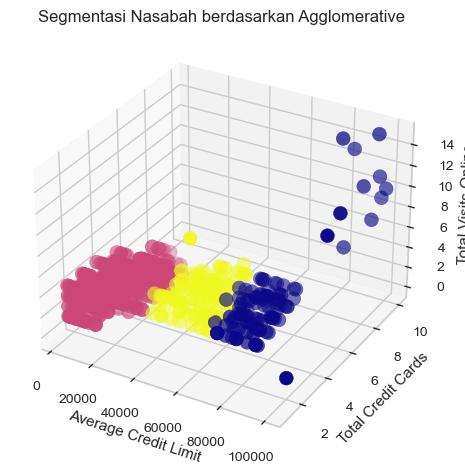

Silhouette Score K-Means: 0.705


In [17]:
import seaborn as sns  # Untuk visualisasi data
from matplotlib.colors import ListedColormap  # Untuk custom warna

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

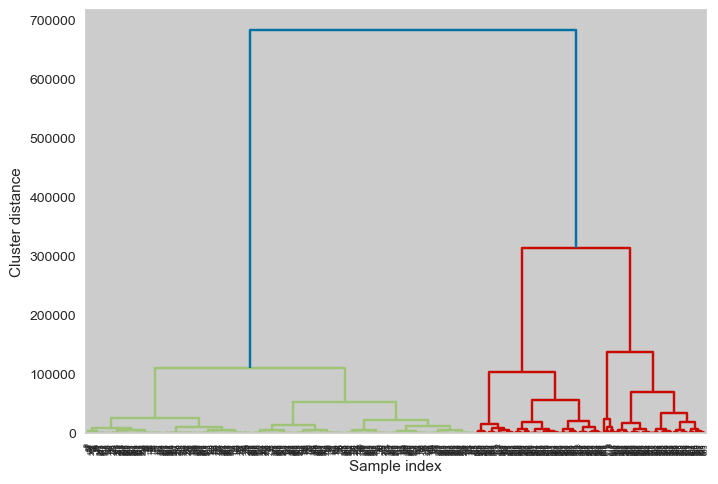

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')

dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

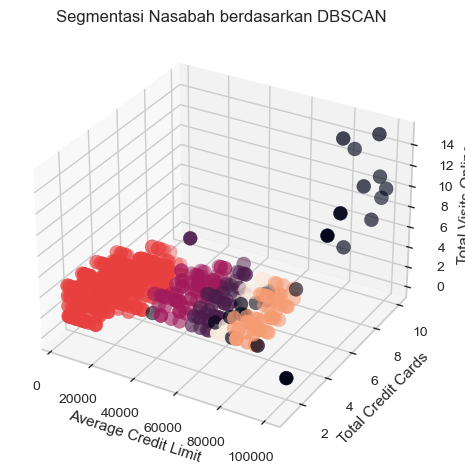

Silhouette Score K-Means: 0.657


In [28]:
from sklearn.cluster import DBSCAN

DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [29]:
import pickle

with open('KMeans_mode.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
